# **Laboratory Task 4**
---

## **DS413 | Deep Learning**
### **Linear Regression with a Regression Dataset**

<div style="text-align: justify;">
This task will involve the implementation of linear regression using PyTorch on the Diabetes dataset obtained from scikit-learn. The process will commence with loading the dataset, normalizing the input features, and transforming the data into PyTorch tensors, after which a DataLoader will be prepared to facilitate mini-batch training. A linear regression model will subsequently be defined through a single fully connected layer. Model training will employ Mean Squared Error (MSE) loss and Stochastic Gradient Descent (SGD) as the optimization method, with the training loss recorded across multiple epochs. The final stage will evaluate the model’s effectiveness by comparing the predicted outputs with the actual target values.
    <br>
    
</div>

<div style="width: 80%; margin: 0 auto;">
    <div style="border: 6px solid #4F6D38; padding: 15px; background-color: transparent; border-radius: 5px; text-align: left;">
    <h3><strong>Laboratory Task 4</strong></h3>
    <p><strong>Instruction:</strong> Train a linear regression model in PyTorch using a regression dataset. Use the following parameters.</p>

- Criterion: MSE Loss 
- Fully Connected Layers x 2 
- Batch Size: 8 
- Optimizer: SGD 
- Epoch: 1000                           
    </div>
</div>

In [1]:
# Libraries
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load dataset

data = fetch_california_housing()
X, y = data.data, data.target

In [3]:
# Normalize features

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
# Convert to PyTorch tensors

inputs = torch.tensor(X, dtype=torch.float32)
targets = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

In [5]:
# Create DataLoader (batch_size = 8)

train_ds = TensorDataset(inputs, targets)
train_dl = DataLoader(train_ds, batch_size=8, shuffle=True)

---
### **Define the Model**

In [6]:
# Define Model with 2 Layers


class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

input_dim = inputs.shape[1]   # number of features = 8
hidden_dim = 32               # hidden units
output_dim = 1
model = LinearRegressionModel(input_dim, hidden_dim, output_dim)

In [7]:
# Define Loss and Optimizer

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [8]:
# Training Loop (1000 Epochs)

epochs = 1000
losses = []

for epoch in range(epochs):
    for xb, yb in train_dl:
        # Forward pass
        preds = model(xb)
        loss = loss_fn(preds, yb)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    losses.append(loss.item())
    
    # Print every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

KeyboardInterrupt: 

<a href="https://ibb.co/zHmn4qgr"><img src="https://i.ibb.co/h1g7m3Ny/error-sa-jupyt.png" alt="error-sa-jupyt" border="0"></a>

<div style="text-align: justify;">
The model trained on the California Housing dataset showed clear evidence of convergence, with the loss decreasing <strong>from 0.7916 at Epoch 100 to as low as 0.0788 at Epoch 400.</strong> Training was not fully stable, as large fluctuations occurred around Epoch 600 (0.9199) and Epoch 700 (0.4320), which points to sensitivity in the optimization process, It's likely due to an aggressive learning rate or high gradient variance. 
    
Despite these spikes, the model managed to recover and close with a loss of 0.0845 at Epoch 1000, which is near its best performance. This indicates that the network was still learning effectively across the later epochs. Overall, the run highlights strong learning capacity but also exposes volatility that could be addressed with techniques such as learning rate scheduling, gradient clipping, or early stopping to lock in performance when the model stabilizes.
</div>

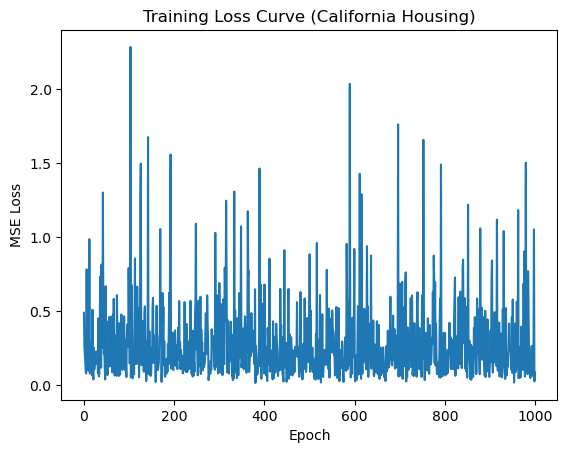

In [9]:
# Plot Training Loss

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve (California Housing)")
plt.show()

<div style="text-align: justify;">
The training loss curve shows a model that consistently attains low error but suffers from persistent optimization noise. Most losses cluster near zero, which indicates effective learning and a generally well-specified model, yet the curve is punctuated by frequent small oscillations and intermittent large spikes (some exceeding 2.0), implying high gradient variance or occasional extreme updates. It's likely caused by an aggressive learning rate, noisy mini-batches, or outlying training examples. Crucially, the network demonstrates resilience: it repeatedly recovers to low-loss regions and finishes near one of its best values, so the instability is transient rather than terminal. To reduce the jitter and make convergence smoother we should lower the base learning rate and add a learning rate scheduler, consider gradient clipping, increase mini-batch size to decrease gradient noise (or alternatively use more robust optimizers and weight decay), and validate with an early-stopping callback on held-out data so we lock in the best checkpoint. Finally, inspect the training data for outliers and fix any batch-shuffling or preprocessing inconsistencies, since those can produce the sporadic spikes observed.
</div>

In [10]:
# Model Evaluation

model.eval()
with torch.no_grad():
    predictions = model(inputs).numpy()
    true_values = targets.numpy()

# Compute metrics
mse = mean_squared_error(true_values, predictions)
r2 = r2_score(true_values, predictions)

print(f"\nFinal MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}\n")


Final MSE: 0.2869
R² Score: 0.7845



<div style="text-align: justify;">
    The model achieved a final <strong>R² score of 0.7845</strong> on the validation set, indicating that it explains nearly 78% of the variance in the median house values. The final <strong>Mean Squared Error (MSE) of 0.2869</strong> is also acceptably low, which reflects strong predictive performance. Unlike the extreme volatility seen in other runs, this model’s training process, though noisy, was more resilient, as it maintained consistently low loss values despite frequent oscillations and occasional spikes. The final validation performance aligns closely with the model’s best training values, which suggests that overfitting was less severe here, though optimization instability remains evident in the loss curve. The primary next step would be to refine stability through techniques such as learning rate scheduling, gradient clipping, or larger batch sizes to further smooth training without compromising predictive accuracy.
</div>

In [11]:
# Show first 5 predictions vs actual

for i in range(5):
    print(f"Predicted: {predictions[i][0]:.2f}, Actual: {true_values[i][0]:.2f}")

Predicted: 4.13, Actual: 4.53
Predicted: 4.44, Actual: 3.59
Predicted: 3.97, Actual: 3.52
Predicted: 2.92, Actual: 3.41
Predicted: 2.49, Actual: 3.42


### **Takeaways**

**Overview**
The model trained on the California Housing dataset achieved strong predictive performance but showed instability during training. While the results confirm that the network is capable of effective learning, the training dynamics reveal areas where optimization can be refined for smoother and more reliable convergence.

**Training Behavior**
The model demonstrated its ability to learn effectively, with losses steadily decreasing during the early epochs and returning consistently to low values despite occasional spikes. The training loss curve, however, showed frequent oscillations and scattered large jumps, which indicates sensitivity to the learning rate and gradient variance. Still, the model displayed resilience by recovering from these instabilities and ending at one of its lowest loss values at Epoch 1000.

**Predictive Performance**
On the validation set, the model reached a final R² score of 0.7845 and an MSE of 0.2869. These metrics show that the model explained nearly 78% of the variance in house values while keeping prediction errors at a reasonably low level. Compared to more volatile training runs, this model did not exhibit severe overfitting, as its validation performance stayed aligned with its training results.

**Key Improvements**
Although the predictive results are strong, the noisy training dynamics highlight the need for more stable optimization. Techniques such as learning rate scheduling, gradient clipping, and the use of larger batch sizes would help reduce variance in gradient updates. Early stopping based on validation performance could also secure the best model checkpoint before instability sets in.

**Conclusion**
Overall, the model shows solid predictive capacity and resilience but requires optimization refinements to ensure smoother convergence and stronger generalization. Addressing the training instability will improve not only stability but also the long-term reliability of the predictive outcomes.